# The social aspect of  cryptocurrencies
This will analyze different cryptocurrencies in order to get insight into ROI, country of origin, and number of exchanges listed


### How does exchange listing affect the price of a coin?
#### Will coins listed in more exchanges have a higher appreciation in price?


### From the top 100 coins, how many coins have appreciated double digits? triple? quadruple?

### Does country of origin affect price of coin?


### What is the relationship between market cap and percentage gains in the last 3 years?

### How does reddit subscribers, twitter followers, and alexa rank affects price?

In [32]:
%matplotlib notebook

In [1]:
#import dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt

In [2]:
# Find an API that has information on coin
base_url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=300&page=1&sparkline=false"
response_json = requests.get(base_url).json()


In [3]:
# Checkout the response

response_json

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 55826,
  'market_cap': 1045902513719,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1175315243948,
  'total_volume': 58369649974,
  'high_24h': 57270,
  'low_24h': 54559,
  'price_change_24h': 474.41,
  'price_change_percentage_24h': 0.85709,
  'market_cap_change_24h': 7206302220,
  'market_cap_change_percentage_24h': 0.69378,
  'circulating_supply': 18687712.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -13.63686,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 82436.82044,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-21T16:42:28.849Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880'

In [4]:
## How does exchange listing affect the price of a coin?
# 1.  Get price change of coins in last 5 years
# 1.  Get numbers of exchange that coin is listed on

In [5]:
# create empty list to hold cryptocurrencies
crypto_currencies = []

In [6]:
crypto_currencies.append(response_json)

In [7]:
crypto_currencies[0]

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 55826,
  'market_cap': 1045902513719,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1175315243948,
  'total_volume': 58369649974,
  'high_24h': 57270,
  'low_24h': 54559,
  'price_change_24h': 474.41,
  'price_change_percentage_24h': 0.85709,
  'market_cap_change_24h': 7206302220,
  'market_cap_change_percentage_24h': 0.69378,
  'circulating_supply': 18687712.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -13.63686,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 82436.82044,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-21T16:42:28.849Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880'

In [24]:
# make main data frame to work on
crypto_df = pd.DataFrame(crypto_currencies[0])
crypto_df = crypto_df[['id', 'symbol', 'current_price','market_cap', 'market_cap_rank', 'ath', 'ath_change_percentage', 'ath_date','atl', 'atl_change_percentage', 'atl_date']]
crypto_df['market_cap'] = crypto_df['market_cap']/1000000000
crypto_df.rename(columns={'market_cap':'market_cap_billion(2021)',
                          'current_price' : 'price_04-22-21'
                          
                         }, inplace=True)
crypto_df.head()

,id,symbol,price_04-22-21,market_cap_billion(2021),market_cap_rank,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,bitcoin,btc,55826.00,1045.902514,1,64805.00,-13.63686,2021-04-14T11:54:46.763Z,67.810000,8.243682e+04,2013-07-06T00:00:00.000Z
1,ethereum,eth,2437.31,281.819620,2,2544.30,-4.15107,2021-04-16T01:00:14.650Z,0.432979,5.631352e+05,2015-10-20T00:00:00.000Z
2,binancecoin,bnb,583.10,90.179132,3,610.06,-4.34367,2021-04-12T09:32:32.635Z,0.039818,1.465471e+06,2017-10-19T00:00:00.000Z
3,ripple,xrp,1.38,63.616986,4,3.40,-59.31702,2018-01-07T00:00:00.000Z,0.002686,5.137000e+04,2014-05-22T00:00:00.000Z
4,tether,usdt,1.00,49.331185,5,1.32,-24.22095,2018-07-24T00:00:00.000Z,0.572521,7.512529e+01,2015-03-02T00:00:00.000Z


In [21]:
# Get each coin's price on 01-04-2018 to now
# Make empty list to hold the value of coins

coin_data_2017 = []

target_date = "01-04-2018"
# Make for loop to perform multiple request getting data utilizing the existing data frame as guide

for index, row in crypto_df.iterrows():
    target_coin = row['id']
    print(f"Processing {target_coin}")
    
    
    try:
        # build url
        price_url = f"https://api.coingecko.com/api/v3/coins/{target_coin}/history?date={target_date}localization=False"
        # save json respons
        response_json = requests.get(price_url).json()
        # traverse json getting specific data
        coin_id = response_json['id']
        coin_price = response_json['market_data']['current_price']['usd']
        coin_reddit_subscribers = response_json['community_data']['reddit_subscribers']
        coin_twitter_followers = response_json['community_data']['twitter_followers']
        coin_alexa_rank = response_json['public_interest_stats']['alexa_rank']
        # Add data to empty list in dictionary style
        coin_data_2017.append({
            "id" : coin_id,
            f"price {target_date}" : coin_price,
            f"reddit_subscribers {target_date}" : coin_reddit_subscribers,
            f"twitter_followers {target_date}" : coin_twitter_followers,
            f"alexa_rank {target_date}" : coin_alexa_rank
               })
    except :
        print("coin information not found... skipping")
    
 

Processing bitcoin
Processing ethereum
Processing binancecoin
Processing ripple
Processing tether
Processing cardano
Processing dogecoin
Processing polkadot
coin information not found... skipping
Processing uniswap
coin information not found... skipping
Processing litecoin
Processing bitcoin-cash
Processing chainlink
Processing vechain
coin information not found... skipping
Processing usd-coin
coin information not found... skipping
Processing stellar
Processing theta-token
Processing filecoin
coin information not found... skipping
Processing tron
Processing solana
coin information not found... skipping
Processing wrapped-bitcoin
coin information not found... skipping
Processing neo
Processing monero
Processing binance-usd
coin information not found... skipping
Processing eos
Processing iota
Processing klay-token
coin information not found... skipping
Processing bitcoin-cash-sv
coin information not found... skipping
Processing bittorrent-2
coin information not found... skipping
Processi

Processing reddcoin
Processing serum
coin information not found... skipping
Processing aragon
Processing kava
coin information not found... skipping
Processing alchemix
coin information not found... skipping
Processing akash-network
coin information not found... skipping
Processing seth
coin information not found... skipping
Processing celer-network
coin information not found... skipping
Processing unibright
coin information not found... skipping
Processing safemars
coin information not found... skipping
Processing ultra
coin information not found... skipping
Processing rocket-pool
coin information not found... skipping
Processing metadium
coin information not found... skipping
Processing haven
coin information not found... skipping
Processing zipmex-token
coin information not found... skipping
Processing audius
coin information not found... skipping
Processing wanchain
Processing storj
Processing anchor-protocol
coin information not found... skipping
Processing paid-network
coin infor

In [26]:
_2017_df =  pd.DataFrame(coin_data_2017)
_2017_df.dropna(inplace=True)
_2017_df

,id,price 01-04-2018,reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,6975.275314,785619.0,819312,5574.0
1,ethereum,395.796381,348116.0,382159,8204.0
2,binancecoin,11.115511,40605.0,176,230.0
3,ripple,0.511990,184063.0,843082,5224.0
5,cardano,0.155532,60486.0,124345,13650.0
...,...,...,...,...,...
85,monacoin,3.125892,2786.0,3411,296588.0
86,utrust,0.137055,2864.0,27532,92471.0
87,origintrail,0.111769,4106.0,9771,108390.0
88,gas,15.756819,88366.0,299331,23186.0


<IPython.core.display.Javascript object>


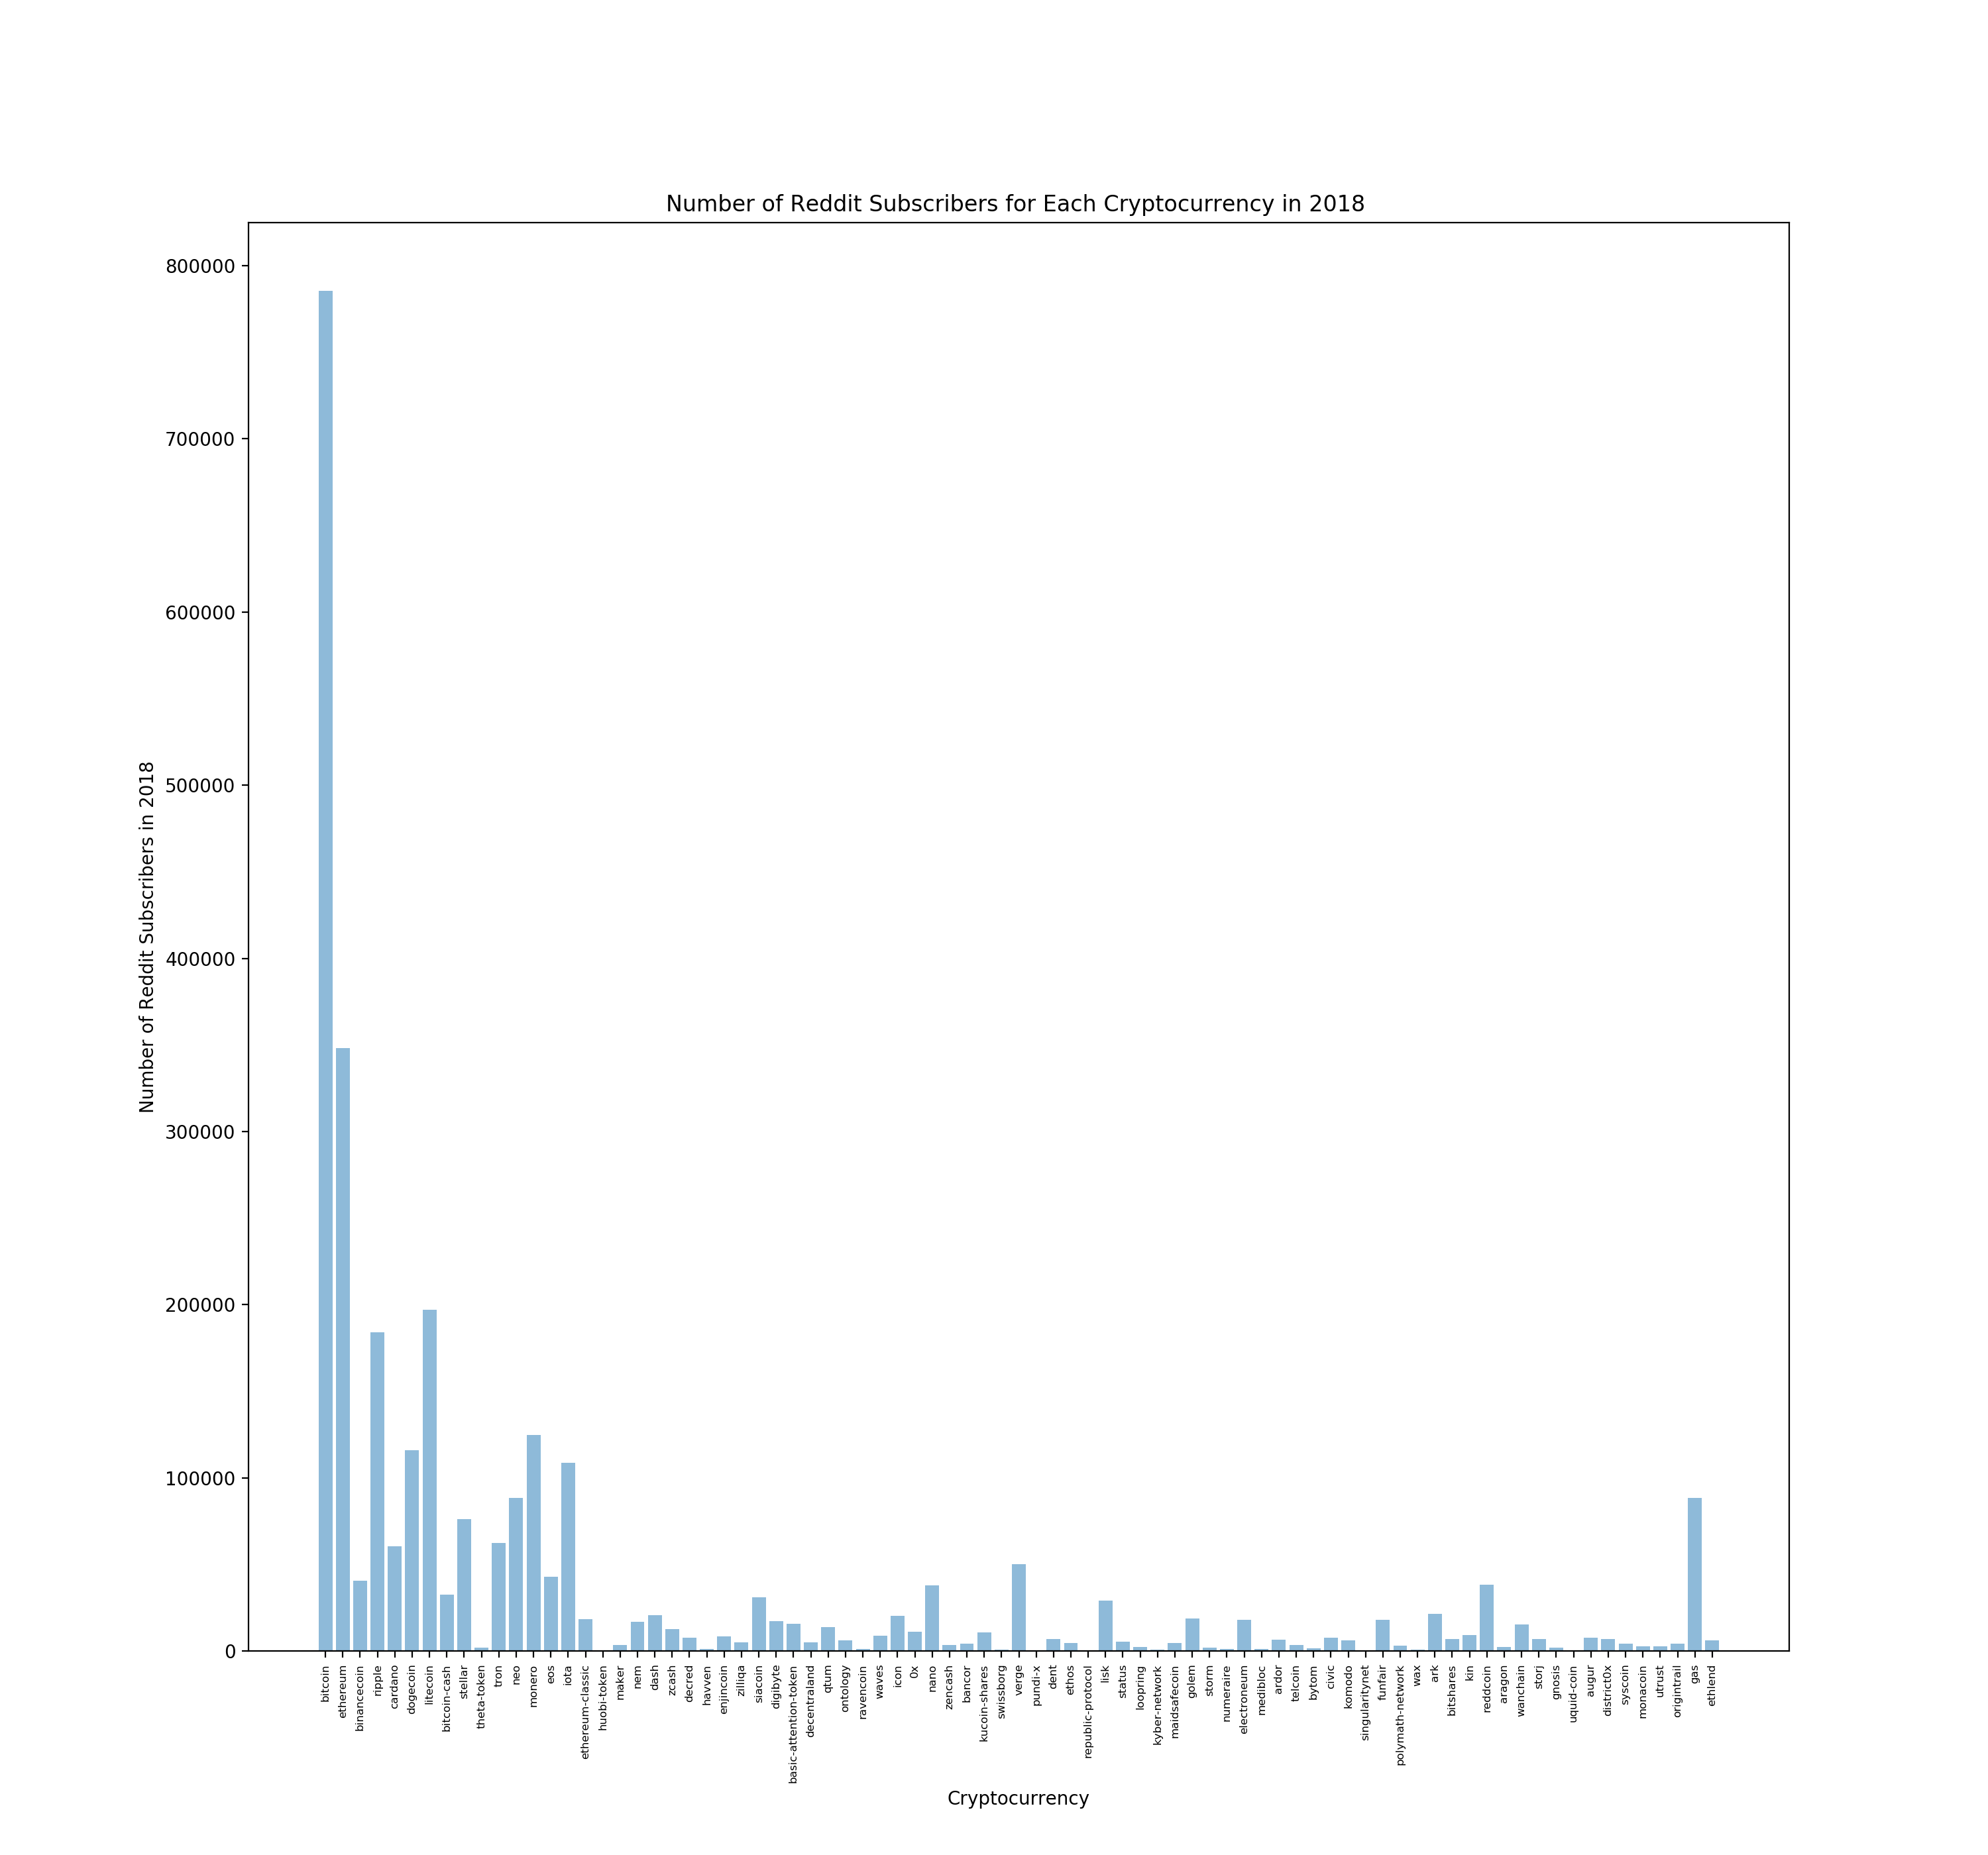

Text(0.5, 1.0, 'Number of Reddit Subscribers for Each Cryptocurrency in 2018 ')

In [62]:
plt.figure(figsize = (15,14))
x_axis = np.arange(len(_2017_df))
tick_locations = [value for value in x_axis]
y_values = _2017_df['reddit_subscribers 01-04-2018']
plt.bar(x_axis, y_values, alpha=0.5)
plt.xticks(tick_locations, _2017_df['id'], rotation='vertical', size=6)
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Reddit Subscribers in 2018")
plt.title("Number of Reddit Subscribers for Each Cryptocurrency in 2018 ")